In [1]:
from pymatgen import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.ext.matproj import MPRester
from IPython.display import display, Math 
import numpy as np
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt

In [2]:
# téléchargement de la structure des bandes de phonons du matériau

with MPRester("1dFKRUfD65SqW4BO") as m: 
    bandes = m.get_phonon_bandstructure_by_material_id("mp-862631")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



## Structure des bandes de phonons

In [3]:
# récupération de données nécessaires

phonplot = PhononBSPlotter(bandes) # donne accès à des données et graphes des structures de bandes
info = phonplot.bs_plot_data() # enregistre des données sous forme de dictionnaire 
pts0 = info.get("ticks").get("label") # liste des points sommets des segments du parcous
dist0 = info.get("ticks").get("distance") # les distances du parcours par rapport à l'origine
freq = info.get("frequency") # pls listes imbriquées pour les fréquences de chaque point ([branch][qpoint][mode])
distfull = info.get("distances") # liste de listes des distances de chaque point considéré le long du parcours


In [4]:
# ajustement des listes dist0 et pts0 car des données sont en doubles
dist = np.array([dist0[0], dist0[1], dist0[3], dist0[5], dist0[7], dist0[9], dist0[11], dist0[13], dist0[15], dist0[17], dist0[18]])
pts = np.array([pts0[0], pts0[1], pts0[3], pts0[5], pts0[7], pts0[9], pts0[11], pts0[13], pts0[15], pts0[17], pts0[18]])


 Voici le graphe de la structure de bande de phonons du Ba2SbAu, en fonction du parcours dans la première zone de Brillouin.


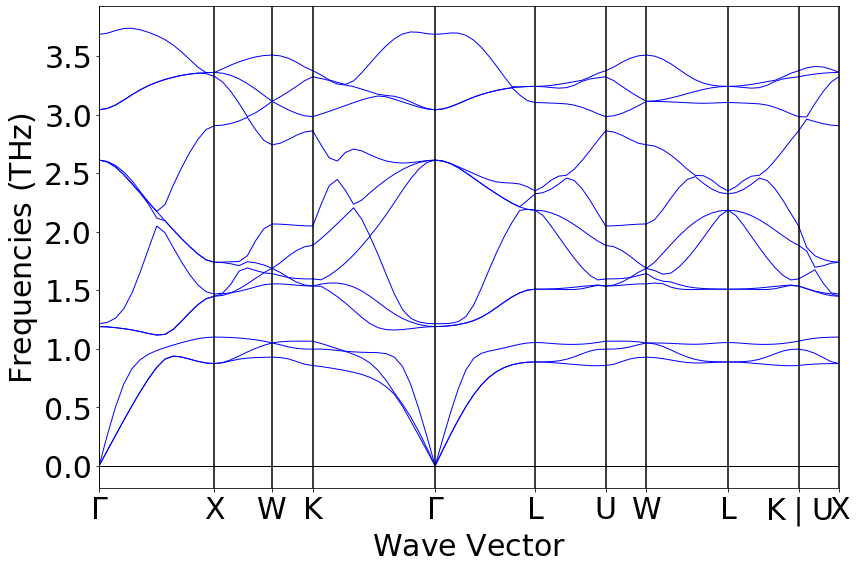

In [5]:
# visualisation globale

print(" Voici le graphe de la structure de bande de phonons du Ba2SbAu, en fonction du parcours dans la première zone de Brillouin.")
phonplot.show()

## Vitesse du son

#### La vitesse de propagation d'un phonon, et donc la vitesse du son, est donnée par la pente de la relation de dispersion. C'est à dire la dérivée de la pulsation du phonon selon le vecteur d'onde: $\frac{\partial \omega_k}{\partial k}$. Lorsque des faibles valeurs de $k$ sont considérées, la relation de dispersion peut être approximée de manière linéraire. Ainsi la vitesse du son obtenue sera une constante.
#### L'étude de la vitesse du son sera donc réalisée dans 3 sections différentes de la zone de Brillouin, à proximité de l'origine $\Gamma$.

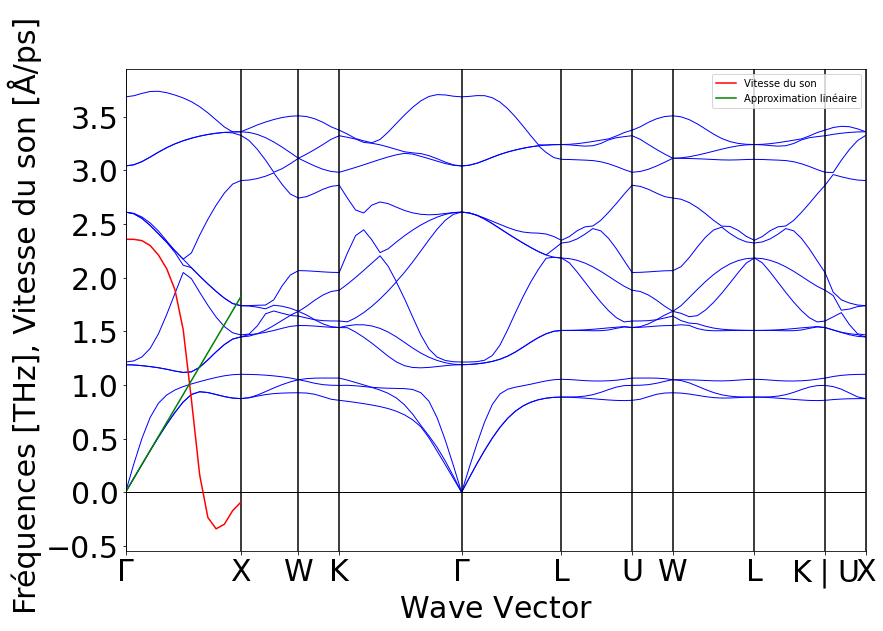

Ci-dessus sont mis en évidence la vitesse du son et la droite d'approximation linéaire de la dispersion sur le parcours Γ->X.
La vitesse maximale atteinte vaut 2.3577741599709334 [Å/ps].
La vitesse minimale atteinte vaut -0.3402692265461334 [Å/ps].
L'approximation donne quant à elle une valeur de 2.3577741599709334 [Å/ps], correspondant bien à la vitesse en Γ.


In [6]:
# branche Gamma-X 

fr = freq[0][0] # première branche acoustique
d = distfull[0]

v = np.gradient(fr,d[1]-d[0]) # dérivée de la pulsation
pente = v[0]
lin = np.multiply(pente,d) # approximation linéaire

plt = phonplot.get_plot()
plt.plot(d, v, color="red", label="Vitesse du son")
plt.plot(d, lin, color="green", label="Approximation linéaire")
plt.ylabel("Fréquences [THz], Vitesse du son [Å/ps] ") # pico seconde car fréquence en THz
plt.legend()
plt.show()

print("Ci-dessus sont mis en évidence la vitesse du son et la droite d'approximation linéaire de la dispersion sur le parcours Γ->X.")
print("La vitesse maximale atteinte vaut "+ str(np.max(v))+ " [Å/ps].")
print("La vitesse minimale atteinte vaut "+ str(np.min(v))+ " [Å/ps].")
print("L'approximation donne quant à elle une valeur de "+ str(pente) + " [Å/ps], correspondant bien à la vitesse en Γ.")

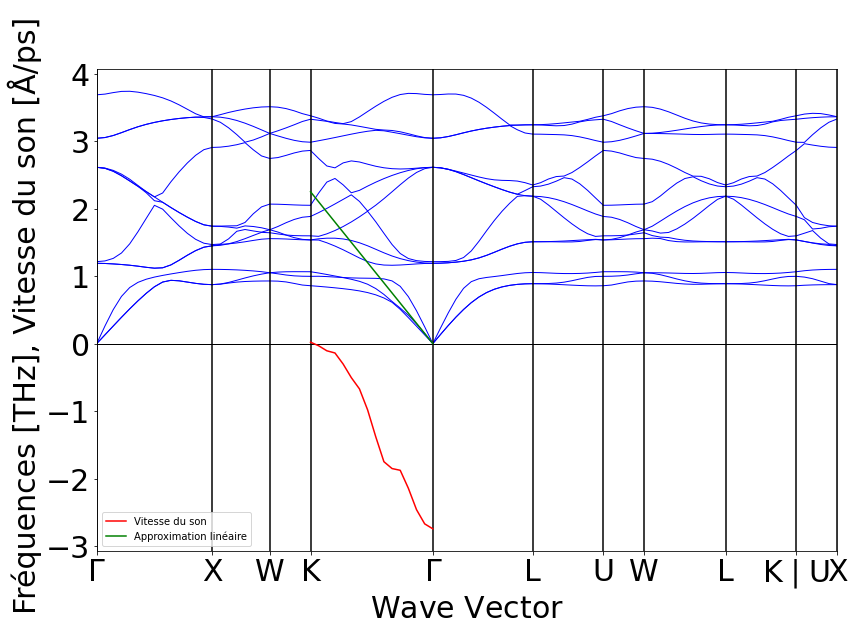

Ci-dessus sont mis en évidence la vitesse du son et la droite d'approximation linéaire de la dispersion sur le parcours K->Γ.
La vitesse maximale atteinte vaut 0.020937322031274776 [Å/ps].
La vitesse minimale atteinte vaut -2.743374873201138 [Å/ps].
L'approximation donne quant à elle une valeur de -2.743374873201138 [Å/ps], correspondant bien à la vitesse en Γ.


In [8]:
# branche K-Gamma

fr = freq[3][1] # deuxième branche acoustique 
d = distfull[3]

v = np.flip(np.gradient(fr,d[1]-d[0])) # dérivée de la pulsation (flip pour considérer le sens Gamma->K)
pente = -v[0]
lin = np.flip(np.multiply(pente,d)) # approximation linéaire
lin = lin- pente*d[0] # ajustement vertical

plt = phonplot.get_plot()
plt.plot(d, np.flip(v), color="red", label="Vitesse du son")
plt.plot(d, lin, color="green", label="Approximation linéaire")
plt.ylabel("Fréquences [THz], Vitesse du son [Å/ps] ")
plt.legend()
plt.show()

print("Ci-dessus sont mis en évidence la vitesse du son et la droite d'approximation linéaire de la dispersion sur le parcours K->Γ.")
print("La vitesse maximale atteinte vaut "+ str(np.max(v))+ " [Å/ps].")
print("La vitesse minimale atteinte vaut "+ str(np.min(v))+ " [Å/ps].")
print("L'approximation donne quant à elle une valeur de -"+ str(pente) + " [Å/ps], correspondant bien à la vitesse en Γ.")


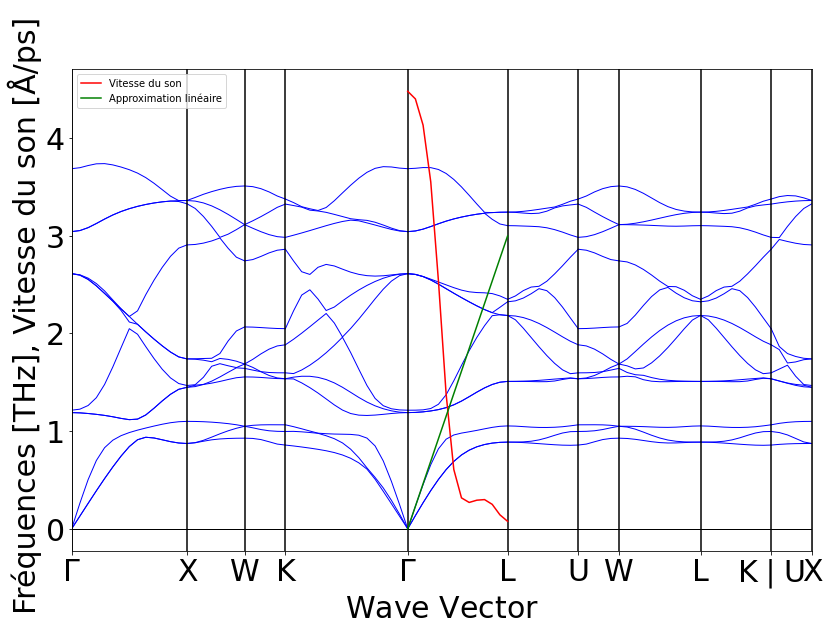

Ci-dessus sont mis en évidence la vitesse du son et la droite d'approximation linéaire de la dispersion sur le parcours Γ->L.
La vitesse maximale atteinte vaut 4.47718486216628 [Å/ps].
La vitesse minimale atteinte vaut 0.07675469592994938 [Å/ps].
L'approximation donne quant à elle une valeur de 4.47718486216628 [Å/ps], correspondant bien à la vitesse en Γ.


In [9]:
# branche Gamma-L

fr = freq[4][2] # troisième branche acoustique
d = distfull[4]


v = np.gradient(fr,d[1]-d[0]) # dérivée de la pulsation
pente = v[0]
lin = np.multiply(pente,d) # approximation linéaire
lin = lin- pente*d[0] # ajustement

plt = phonplot.get_plot()
plt.plot(d, v, color="red", label="Vitesse du son")
plt.plot(d, lin, color="green", label="Approximation linéaire")
plt.ylabel("Fréquences [THz], Vitesse du son [Å/ps] ")
plt.legend()
plt.show()

print("Ci-dessus sont mis en évidence la vitesse du son et la droite d'approximation linéaire de la dispersion sur le parcours Γ->L.")
print("La vitesse maximale atteinte vaut "+ str(np.max(v))+ " [Å/ps].")
print("La vitesse minimale atteinte vaut "+ str(np.min(v))+ " [Å/ps].")
print("L'approximation donne quant à elle une valeur de "+ str(pente) + " [Å/ps], correspondant bien à la vitesse en Γ.")

#### Ces trois analyses illustrent très bien que l'approximation linéaire ne donne des valeurs de vitesse représentatives de la réalité que lorsque les valeurs du vecteur d'onde $k$ sont suffisamment faibles, c'est à dire à proximité de $\Gamma$. Á mesure que l'on s'éloigne de ce point d'origine et s'approche de la limite de la zone de Brillouin, l'approximation devient rapidement erronée.